In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt

In [2]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0,
                    8.0, 3.0, -4.0, 6.0, 13.0, 21.0]).unsqueeze(-1)
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4]).unsqueeze(-1)
t_un = 0.1 * t_u

randIndices = torch.randperm(t_c.shape[0])
threshold = int(t_c.shape[0] * 0.8)

t_c_train = t_c[randIndices[:threshold]]
t_u_train = t_u[randIndices[:threshold]]
t_un_train = t_un[randIndices[:threshold]]

t_c_test = t_c[randIndices[threshold:]]
t_u_test = t_u[randIndices[threshold:]]
t_un_test = t_un[randIndices[threshold:]]

In [133]:
model = nn.Sequential(OrderedDict([
    ("1 linear hidden layer", nn.Linear(1, 500)),
    ("1 hidden tanh", nn.Tanh()),
    ("2 hidden layer", nn.Linear(500, 1000)),
    ("2 hidden sigmoid", nn.Sigmoid()),
    ("3 last hidden layer", nn.Linear(1000, 1)),
]))


In [124]:
lossFn = nn.MSELoss()

In [142]:
model = nn.Sequential(
    nn.Linear(1, 2),
    nn.ReLU(),
    nn.Linear(2, 1),
)



epochs = 20000
lr = 1e-3
optimizer = optim.SGD(model.parameters(), lr)

for i in range(epochs):
    t_pred = model(t_un)
    loss = lossFn(t_c, t_pred)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if i % 1000 == 0:
        print(loss)

tensor(272.4599, grad_fn=<MseLossBackward0>)
tensor(3.5061, grad_fn=<MseLossBackward0>)
tensor(3.0105, grad_fn=<MseLossBackward0>)
tensor(2.8684, grad_fn=<MseLossBackward0>)
tensor(2.7687, grad_fn=<MseLossBackward0>)
tensor(2.6987, grad_fn=<MseLossBackward0>)
tensor(2.6494, grad_fn=<MseLossBackward0>)
tensor(2.6148, grad_fn=<MseLossBackward0>)
tensor(2.5904, grad_fn=<MseLossBackward0>)
tensor(2.5733, grad_fn=<MseLossBackward0>)
tensor(2.5612, grad_fn=<MseLossBackward0>)
tensor(2.5528, grad_fn=<MseLossBackward0>)
tensor(2.5468, grad_fn=<MseLossBackward0>)
tensor(2.5426, grad_fn=<MseLossBackward0>)
tensor(2.5396, grad_fn=<MseLossBackward0>)
tensor(2.5375, grad_fn=<MseLossBackward0>)
tensor(2.5361, grad_fn=<MseLossBackward0>)
tensor(2.5350, grad_fn=<MseLossBackward0>)
tensor(2.5343, grad_fn=<MseLossBackward0>)
tensor(2.5338, grad_fn=<MseLossBackward0>)


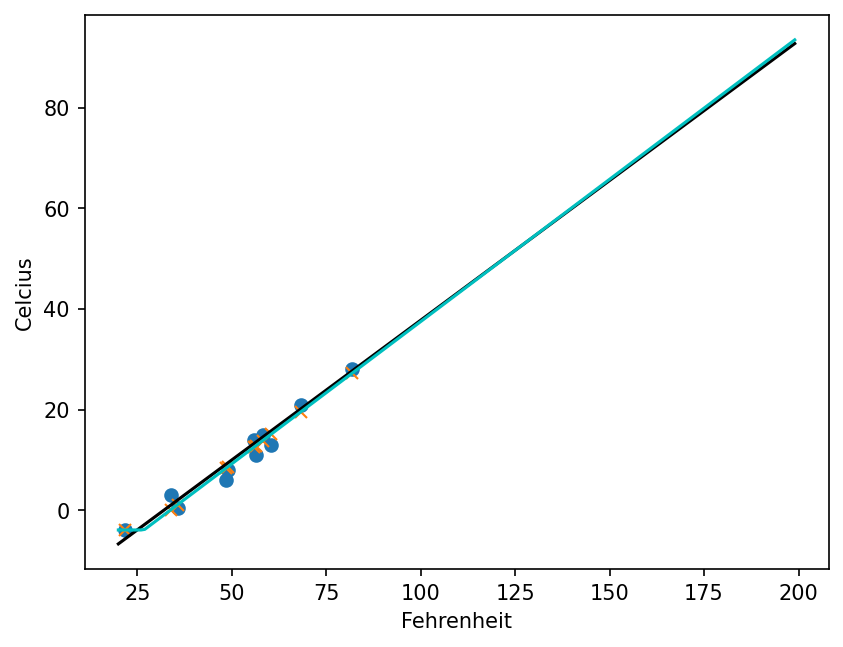

In [143]:
fig = plt.figure(dpi=150)
t_range = torch.arange(20., 200.).unsqueeze(1)
plt.xlabel("Fehrenheit")
plt.ylabel("Celcius")
plt.plot(t_u, t_c, 'o')
plt.plot(t_u, model(t_un).detach(), 'x')

plt.plot(t_range, (t_range - 32) / (9/5), 'k')
plt.plot(t_range, model(t_range * 0.1).detach(), 'c')